In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/summer-analytics-mid-hackathon'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        print(f"{filename}\n")

/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv
hacktest.csv

/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv
hacktrain.csv



In [2]:
import pandas as pd
import numpy as np

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
traindf = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv")

traindf.head()

,Unnamed: 0,ID,class,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,water,637.5950,658.668,-1882.030,-1924.36,997.904,-1739.990,630.087,...,NaN,-1043.160,-1942.490,267.138,NaN,NaN,211.328,-2203.020,-1180.19,433.906
1,1,2,water,634.2400,593.705,-1625.790,-1672.32,914.198,-692.386,707.626,...,NaN,-933.934,-625.385,120.059,364.858,476.972,220.878,-2250.000,-1360.56,524.075
2,3,4,water,58.0174,-1599.160,NaN,-1052.63,NaN,-1564.630,NaN,...,-1025.88,368.622,NaN,-1227.800,304.621,NaN,369.214,-2202.120,NaN,-1343.550
3,4,5,water,72.5180,NaN,380.436,-1256.93,515.805,-1413.180,-802.942,...,-1813.95,155.624,NaN,-924.073,432.150,282.833,298.320,-2197.360,NaN,-826.727
4,7,8,water,1136.4400,NaN,NaN,1647.83,1935.800,NaN,2158.980,...,1535.00,1959.430,-279.317,-384.915,-113.406,1020.720,1660.650,-116.801,-568.05,-1357.140


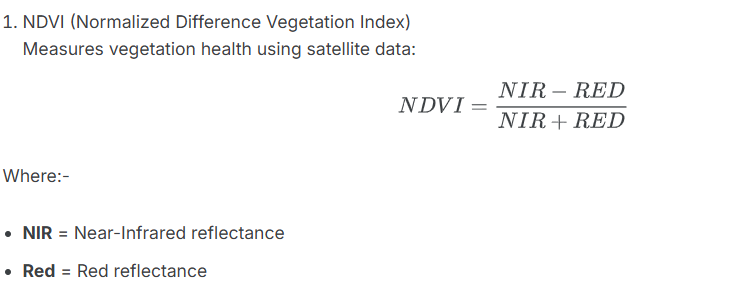

In [5]:
testdf = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktest.csv")

testdf.head()

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
0,0,1,7466.42,413.162,5761.00,5625.45,489.403,3923.84,3097.110,6766.42,...,801.184,927.115,4704.14,6378.42,340.949,2695.570,527.268,4736.75,601.843,6639.760
1,1,2,7235.26,6037.350,1027.56,6085.14,1618.050,6668.54,2513.990,1051.69,...,5533.470,5103.040,5216.12,4885.27,4366.790,1234.140,3298.110,6942.68,1070.440,842.101
2,2,3,7425.08,6969.980,1177.94,7408.93,861.061,7644.43,814.458,1504.29,...,1981.390,6204.540,7021.69,5704.41,4897.450,1789.990,2206.100,6928.93,1036.560,831.441
3,3,4,7119.12,1731.620,6311.93,6441.61,465.979,7128.42,1649.120,6935.22,...,959.344,5794.150,1045.57,5572.90,586.287,685.906,1287.000,6734.72,824.584,6883.610
4,4,5,7519.55,8130.260,1482.54,7879.53,1001.210,7937.60,4122.530,1094.51,...,7636.070,6996.760,7413.43,4596.13,4511.700,1413.520,3283.940,7937.68,1857.800,1336.920


In [6]:
traindf.shape, testdf.shape

((8000, 30), (2845, 29))

In [7]:
traindf.columns, testdf.columns

(Index(['Unnamed: 0', 'ID', 'class', '20150720_N', '20150602_N', '20150517_N',
        '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N',
        '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N',
        '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N',
        '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N',
        '20140218_N', '20140202_N', '20140117_N', '20140101_N'],
       dtype='object'),
 Index(['Unnamed: 0', 'ID', '20150720_N', '20150602_N', '20150517_N',
        '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N',
        '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N',
        '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N',
        '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N',
        '20140218_N', '20140202_N', '20140117_N', '20140101_N'],
       dtype='object'))

To predict: Class in `testdf`

In [8]:
traindf.describe()

,Unnamed: 0,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
count,8000.000000,8000.000000,7440.000000,6800.000000,7200.000000,7040.000000,7520.000000,6880.000000,7280.000000,6640.000000,...,7520.000000,7280.000000,7120.000000,6240.000000,7360.000000,6880.000000,6560.000000,7440.000000,6800.000000,7600.000000
mean,4984.202625,4985.202625,5845.476916,4868.091395,4469.837748,5193.485086,2927.586705,4924.493648,3313.881373,4987.520158,...,4872.681670,3674.886731,3012.178524,3055.167358,2041.316792,2799.820342,2144.360224,6259.064275,2629.203972,2578.449870
std,2900.022898,2900.022898,2261.409128,2758.499942,2876.218394,2510.389832,2728.325670,2600.418802,2434.828743,2674.963286,...,2776.135418,2331.105635,2068.334108,2209.985887,2040.354512,2452.563243,2267.606759,1825.563702,2386.147667,2436.270797
min,0.000000,1.000000,-433.735000,-1781.790000,-2939.740000,-1924.360000,-1794.870000,-1848.910000,-1574.970000,-2532.490000,...,-2683.600000,-1043.160000,-2435.900000,-1505.780000,-1445.370000,55.564100,-232.292000,-2729.430000,-2139.860000,-4145.250000
25%,2514.750000,2515.750000,4331.232500,2067.265000,1521.195000,3087.072500,500.515750,2398.385000,992.778250,2404.075000,...,2010.732500,1369.355000,1368.742500,1009.827500,419.987000,791.741250,501.602750,5938.257500,691.171500,689.199000
50%,4917.500000,4918.500000,6908.255000,5513.375000,4672.000000,5810.755000,1586.240000,5742.485000,2802.010000,5831.120000,...,5484.905000,3659.770000,2633.695000,2624.125000,1183.715000,1599.385000,969.711500,6941.010000,1521.210000,1439.950000
75%,7311.250000,7312.250000,7626.845000,7555.570000,7431.697500,7511.880000,5703.067500,7280.110000,5508.350000,7430.915000,...,7607.755000,5927.035000,4128.082500,4952.317500,3075.997500,4909.997500,3227.380000,7395.612500,4452.257500,4146.342500
max,10544.000000,10545.000000,8376.150000,8566.420000,8650.500000,8516.100000,8267.120000,8499.330000,8001.700000,8452.380000,...,8489.970000,7981.820000,8445.410000,7762.980000,8078.080000,8216.700000,8247.630000,8410.330000,8418.230000,8502.020000


In [9]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8000 non-null   int64  
 1   ID          8000 non-null   int64  
 2   class       8000 non-null   object 
 3   20150720_N  7440 non-null   float64
 4   20150602_N  6800 non-null   float64
 5   20150517_N  7200 non-null   float64
 6   20150501_N  7040 non-null   float64
 7   20150415_N  7520 non-null   float64
 8   20150330_N  6880 non-null   float64
 9   20150314_N  7280 non-null   float64
 10  20150226_N  6640 non-null   float64
 11  20150210_N  7360 non-null   float64
 12  20150125_N  6960 non-null   float64
 13  20150109_N  7120 non-null   float64
 14  20141117_N  6720 non-null   float64
 15  20141101_N  7600 non-null   float64
 16  20141016_N  6560 non-null   float64
 17  20140930_N  7200 non-null   float64
 18  20140813_N  7440 non-null   float64
 19  20140626_N  6400 non-null  

In [10]:
traindf.isnull().sum()

Unnamed: 0       0
ID               0
class            0
20150720_N     560
20150602_N    1200
20150517_N     800
20150501_N     960
20150415_N     480
20150330_N    1120
20150314_N     720
20150226_N    1360
20150210_N     640
20150125_N    1040
20150109_N     880
20141117_N    1280
20141101_N     400
20141016_N    1440
20140930_N     800
20140813_N     560
20140626_N    1600
20140610_N     480
20140525_N     720
20140509_N     880
20140423_N    1760
20140407_N     640
20140322_N    1120
20140218_N    1440
20140202_N     560
20140117_N    1200
20140101_N     400
dtype: int64

In [11]:
traindf.fillna(traindf.median(numeric_only=True), inplace=True)

In [12]:
traindf.isnull().sum()

Unnamed: 0    0
ID            0
class         0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64

In [13]:
traindf.drop(['Unnamed: 0'], axis=1, inplace=True)

<h1>Simple Logistc Regression; Accuracy: 94%</h1>

In [14]:
X = traindf.drop(columns=['class'])
y = traindf['class']

In [15]:
X.shape, y.shape

((8000, 28), (8000,))

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6000, 28), (2000, 28), (6000,), (2000,))

In [19]:
model0 = LogisticRegression(
    multi_class='multinomial',
)

In [20]:
model0.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [21]:
y_preds = model0.predict(X_test)

In [22]:
from sklearn.metrics import auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, classification_report, accuracy_score

In [23]:
print("Classification Report:\n")

print(classification_report(y_test, y_preds))

Classification Report:

              precision    recall  f1-score   support

        farm       0.81      0.82      0.82       207
      forest       0.98      0.99      0.99      1534
       grass       0.67      0.66      0.67        53
  impervious       0.81      0.77      0.79       171
     orchard       0.14      0.11      0.12         9
       water       0.74      0.65      0.69        26

    accuracy                           0.94      2000
   macro avg       0.69      0.67      0.68      2000
weighted avg       0.93      0.94      0.94      2000



<h1>GridSearchCV; Accuracy: 96%</h1>

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [24]:
params = [
    {
        "penalty": ['l1', 'l2', 'elasticnet', None]
    },
    {
        "tol": [0.1, 0.001, 0.0001, 0.00001]
    },
    {
        "C": [1, 1.1, 1.2, 1.3, 1.4, 1.5, 2, 3, 4]
    },
    {
        "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
    },
    {
        "max_iter": [10, 100, 150, 200, 500, 1000]
    },
]

In [25]:
model1 = LogisticRegression()

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
grid_logisticreg = GridSearchCV(model1, params, cv=5, scoring='accuracy', n_jobs=-1)

In [28]:
grid_logisticreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'penalty': ['l1', 'l2', 'elasticnet', None]},
                         {'tol': [0.1, 0.001, 0.0001, 1e-05]},
                         {'C': [1, 1.1, 1.2, 1.3, 1.4, 1.5, 2, 3, 4]},
                         {'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                     'newton-cholesky', 'sag', 'saga']},
                         {'max_iter': [10, 100, 150, 200, 500, 1000]}],
             scoring='accuracy')

In [29]:
y_preds1 = grid_logisticreg.predict(X_test)

In [30]:
print("Classification Report of Model1 using GridSearchCV:\n")

print(classification_report(y_test, y_preds1))

Classification Report of Model1 using GridSearchCV:

              precision    recall  f1-score   support

        farm       0.86      0.88      0.87       207
      forest       0.99      1.00      0.99      1534
       grass       0.84      0.79      0.82        53
  impervious       0.83      0.82      0.83       171
     orchard       0.38      0.33      0.35         9
       water       0.88      0.81      0.84        26

    accuracy                           0.96      2000
   macro avg       0.80      0.77      0.78      2000
weighted avg       0.96      0.96      0.96      2000



In [31]:
grid_logisticreg.best_params_

{'solver': 'newton-cg'}

In [32]:
grid_logisticreg.best_score_

0.9595

In [33]:
grid_logisticreg.best_estimator_

LogisticRegression(solver='newton-cg')

In [34]:
grid_logisticreg.best_index_

19

In [35]:
grid_logisticreg.scorer_

make_scorer(accuracy_score)

In [36]:
grid_logisticreg.n_splits_

5

In [37]:
grid_logisticreg.refit_time_

3.045867443084717

In [38]:
np.unique(y_preds1)

array(['farm', 'forest', 'grass', 'impervious', 'orchard', 'water'],
      dtype=object)

In [39]:
ar_unique, i = np.unique(y_preds1, return_counts=True)
print("Unique values:", ar_unique)
print("Counts:", i)

Unique values: ['farm' 'forest' 'grass' 'impervious' 'orchard' 'water']
Counts: [ 211 1539   50  168    8   24]


<p style="font-size: 25px">
    GridSearchCV Model Performed Better than the Simple Logistic Regression Model
</p>

<h1>
    Simple Pipeline: Imputation, StandardScaler, LogisticRegression; Accuracy: 87%
</h1>

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [41]:
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=1000))
])

In [42]:
traindf = pd.read_csv("/kaggle/input/summer-analytics-mid-hackathon/hacktrain.csv")

traindf.drop(["Unnamed: 0", "ID"], axis=1, inplace=True)

In [43]:
X = traindf.drop(columns=["class"])
y = traindf["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [44]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6000, 27), (6000,), (2000, 27), (2000,))

In [45]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('clf', LogisticRegression(max_iter=1000))])

In [46]:
y_preds2 = pipeline.predict(X_test)

In [47]:
print("Classification Report of Model2 using Pipeline (SimpleImputer, StandardScaler, LogisticRegression):\n")

print(classification_report(y_test, y_preds2))

Classification Report of Model2 using Pipeline (SimpleImputer, StandardScaler, LogisticRegression):

              precision    recall  f1-score   support

        farm       0.68      0.46      0.55       207
      forest       0.90      0.97      0.94      1534
       grass       0.72      0.25      0.37        53
  impervious       0.81      0.77      0.79       171
     orchard       0.33      0.11      0.17         9
       water       0.61      0.54      0.57        26

    accuracy                           0.87      2000
   macro avg       0.68      0.52      0.56      2000
weighted avg       0.86      0.87      0.86      2000



<p style="font-size: 25px">
    Simple Pipeline: Imputation, StandardScaler, LogisticRegression; Accuracy: 87%
</p>

<h3>
    Summary of Models
</h3>

<h4>
    Simple Logistic Regression Model (model0):
    <ul>
        <li>LogisticRegression initialized with <code>multi_class='multinomial'</code>.</li>
        <li>Model trained using <code>model0.fit(X_train, y_train)</code>.</li>
        <li>Predictions made using <code>model0.predict(X_test)</code>.</li>
        <li>Accuracy of 94% is achieved</li>
    </ul>
</h4>

<h4>
    Logistic Regression Model (model1):
    <ul>
        <li>Standard LogisticRegression initialized with default parameters.</li>
        <li>Used as a base estimator for hyperparameter tuning via GridSearchCV.</li>
        <li>GridSearchCV applied on model1 for hyperparameter optimization.</li>
        <li>Parameters tuned: <code>params</code>, using 5-fold cross-validation.</li>
        <li>Scoring based on accuracy with parallel jobs enabled (<code>n_jobs=-1</code>).</li>
        <li>Accuracy of 96% is achieved</li>
    </ul>
</h4>

<h4>
    Pipeline with Imputation (pipeline):
    <ul>
        <li>Pipeline created to preprocess data using <code>SimpleImputer(strategy="mean")</code>.</li>
        <li>Allows sequential execution of imputation followed by model fitting.</li>
        <li>Accuracy of 87% is achieved</li>
    </ul>
</h4>
